Heart Attack Prediction



Dependencies


In [1]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart_prediction_dataset.csv')

Preparing Data 

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Columns dropping :  Patient ID , Triglycerides , Hemisphere - As of initial analysis

In [6]:
df = df.drop(['Patient ID' , 'Triglycerides' , 'Hemisphere', 'Country'] , axis = 'columns')

In [7]:
df.isnull().sum() , df.shape


(Age                                0
 Sex                                0
 Cholesterol                        0
 Blood Pressure                     0
 Heart Rate                         0
 Diabetes                           0
 Family History                     0
 Smoking                            0
 Obesity                            0
 Alcohol Consumption                0
 Exercise Hours Per Week            0
 Diet                               0
 Previous Heart Problems            0
 Medication Use                     0
 Stress Level                       0
 Sedentary Hours Per Day            0
 Income                             0
 BMI                                0
 Physical Activity Days Per Week    0
 Sleep Hours Per Day                0
 Continent                          0
 Heart Attack Risk                  0
 dtype: int64,
 (8763, 22))

In [8]:
df.keys()

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Continent', 'Heart Attack Risk'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [10]:
#Summarizing Values for generic user value recommendation
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,7.000000,10.000000,1.000000


In [11]:
df.corr()

C:\Users\Dev\AppData\Local\Temp\ipykernel_13436\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,0.016056,0.004456,0.019340
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.007725,-0.001245,0.011133
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,0.008537,0.004460,0.000274


C:\Users\Dev\AppData\Local\Temp\ipykernel_13436\3282847909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


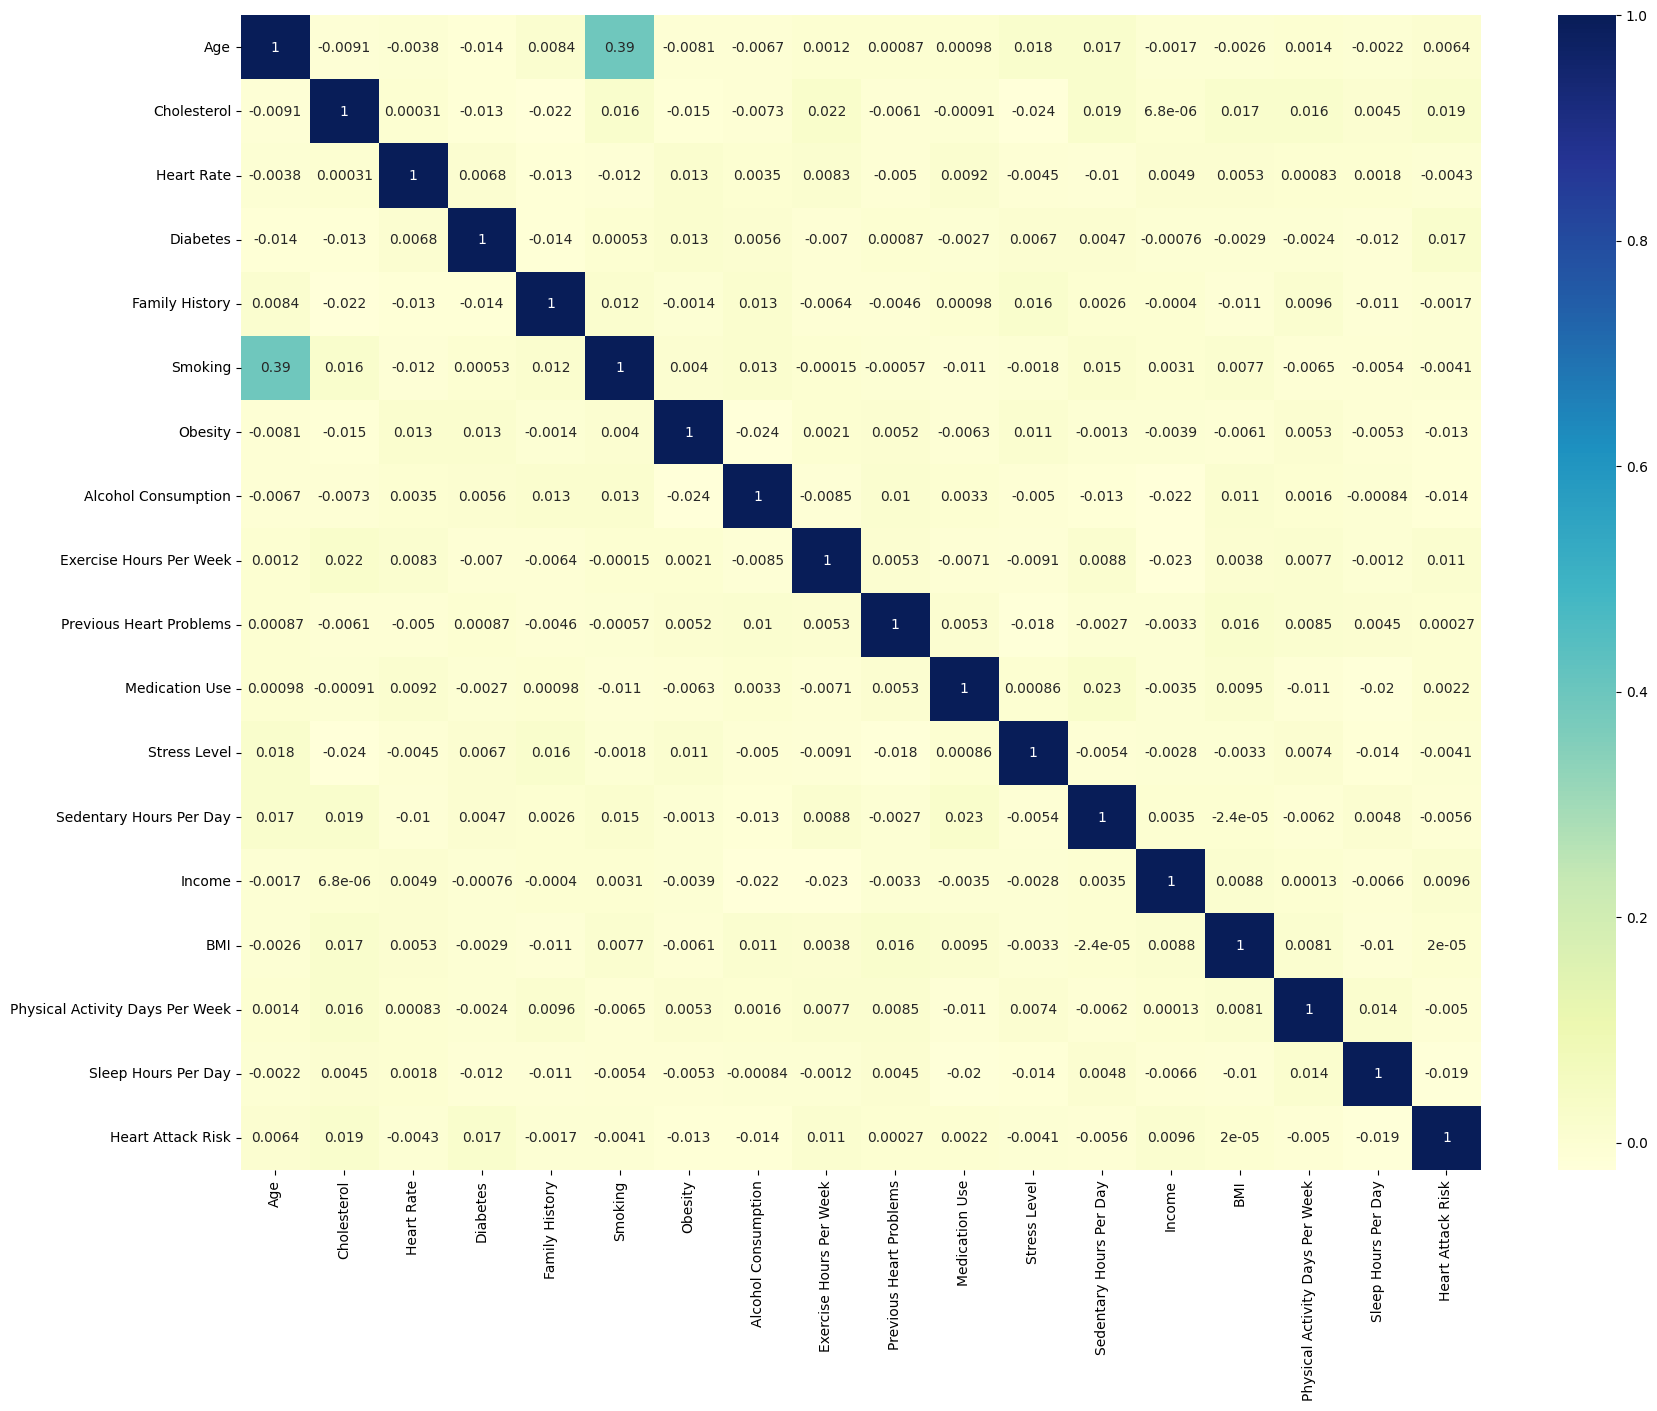

In [12]:
#Visual Check of Corr table --> no outliers found 
plt.figure(figsize=(20, 15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


Text(0, 0.5, 'Heart Attacks')

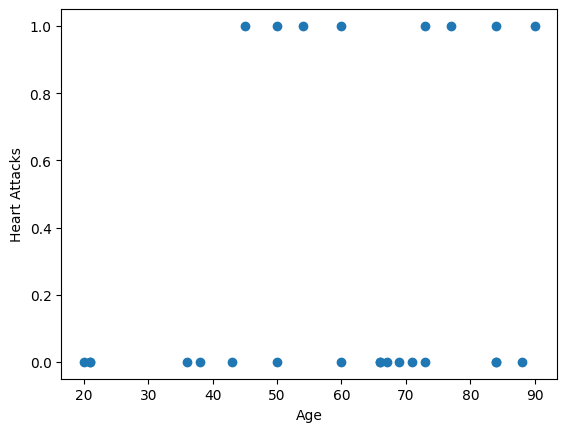

In [13]:
#D.A for Heart attacks vs Age --> Heart attacks increase with age 
test_df = df.head(25)
plt.scatter(test_df['Age'] ,test_df['Heart Attack Risk'] )
plt.xlabel("Age")
plt.ylabel("Heart Attacks")

<Axes: xlabel='Age', ylabel='Heart Attack Risk'>

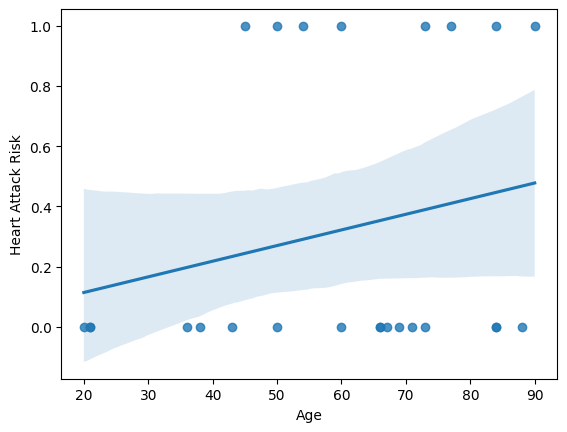

In [14]:
# sns.regplot(x = "Obesity" , y = "Heart Attack Risk", data = test_df)
sns.regplot(x = "Age" , y = "Heart Attack Risk", data = test_df)
# Result --> Relation is less , correleation is not considerable 

Feature Identification - Independant and dependant 

In [15]:
X = df.iloc[: ,:-1]
Y = df.iloc[:,-1]

In [16]:
X


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,0,6,South America
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,1,7,North America
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,4,4,Europe
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,3,4,North America
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,1,5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,7,7,Asia
8759,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,4,9,North America
8760,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,4,4,South America
8761,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,2,8,South America


In [17]:
X = pd.get_dummies(X, columns=['Continent'])

In [18]:
X

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,0,6,0,0,0,0,0,1
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,1,7,0,0,0,0,1,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,4,4,0,0,0,1,0,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,3,4,0,0,0,0,1,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,1,5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,7,7,0,1,0,0,0,0
8759,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,4,9,0,0,0,0,1,0
8760,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,4,4,0,0,0,0,0,1
8761,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,2,8,0,0,0,0,0,1


In [19]:

# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
X[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric
X['Systolic'] = pd.to_numeric(X['Systolic'])
X['Diastolic'] = pd.to_numeric(X['Diastolic'])

In [20]:
X

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic,Diastolic
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,0,6,0,0,0,0,0,1,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,1,7,0,0,0,0,1,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,4,4,0,0,0,1,0,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,3,4,0,0,0,0,1,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,1,5,0,1,0,0,0,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,7,7,0,1,0,0,0,0,94,76
8759,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,4,9,0,0,0,0,1,0,157,102
8760,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,4,4,0,0,0,0,0,1,161,75
8761,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,2,8,0,0,0,0,0,1,119,67


In [21]:
X['Sex'].unique()
X = pd.get_dummies(X, columns=['Sex'])


In [22]:
X

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,0,6,0,0,0,0,0,1,158,88,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,1,7,0,0,0,0,1,0,165,93,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,4,4,0,0,0,1,0,0,174,99,1,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,3,4,0,0,0,0,1,0,163,100,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,1,5,0,1,0,0,0,0,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,7,7,0,1,0,0,0,0,94,76,0,1
8759,28,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,4,9,0,0,0,0,1,0,157,102,1,0
8760,47,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,4,4,0,0,0,0,0,1,161,75,0,1
8761,36,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,2,8,0,0,0,0,0,1,119,67,0,1


In [23]:
#Label Encoding --> 1:healthy, 2:average, 3:unhealthy
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
X['Diet'] = X['Diet'].map(ordinal_map)



In [24]:
X

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,158/88,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,0,6,0,0,0,0,0,1,158,88,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,1,7,0,0,0,0,1,0,165,93,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,4,4,0,0,0,1,0,0,174,99,1,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,3,4,0,0,0,0,1,0,163,100,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,1,5,0,1,0,0,0,0,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,94/76,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,7,7,0,1,0,0,0,0,94,76,0,1
8759,28,120,157/102,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,4,9,0,0,0,0,1,0,157,102,1,0
8760,47,250,161/75,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,4,4,0,0,0,0,0,1,161,75,0,1
8761,36,178,119/67,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,2,8,0,0,0,0,0,1,119,67,0,1


In [25]:
X = X.drop(['Blood Pressure'], axis = 1)

In [26]:
X

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic,Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,0,6,0,0,0,0,0,1,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,1,7,0,0,0,0,1,0,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,4,4,0,0,0,1,0,0,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,3,4,0,0,0,0,1,0,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,1,5,0,1,0,0,0,0,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,7,7,0,1,0,0,0,0,94,76,0,1
8759,28,120,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,4,9,0,0,0,0,1,0,157,102,1,0
8760,47,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,4,4,0,0,0,0,0,1,161,75,0,1
8761,36,178,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,2,8,0,0,0,0,0,1,119,67,0,1


In [27]:
X = X.astype(int)

In [28]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y, test_size= .3,random_state=3)

In [29]:
X_test

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic,Diastolic,Sex_Female,Sex_Male
2661,26,245,104,0,0,0,0,1,17,1,0,1,2,1,106649,22,3,10,0,0,0,0,0,1,125,63,1,0
3267,20,185,100,1,0,0,0,1,15,0,0,0,8,7,53383,19,5,7,0,0,1,0,0,0,99,71,1,0
7939,57,354,44,1,1,1,1,1,8,0,0,0,6,6,245675,22,7,9,0,0,0,0,0,1,124,75,0,1
3722,38,378,69,1,1,1,0,1,11,2,1,1,2,9,209622,25,4,8,0,0,0,1,0,0,125,63,0,1
3007,63,200,63,1,1,1,1,0,17,0,1,0,5,1,199627,35,3,5,0,1,0,0,0,0,164,89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,42,159,73,1,0,1,1,0,16,1,0,1,7,7,122036,27,4,5,0,1,0,0,0,0,92,74,1,0
6095,69,318,62,0,1,1,1,0,6,0,1,1,7,9,194461,32,3,7,0,1,0,0,0,0,148,72,0,1
2197,68,318,100,1,1,1,0,0,7,0,0,1,7,10,62596,39,0,4,0,1,0,0,0,0,165,89,0,1
7944,75,270,59,0,1,1,1,1,19,1,1,1,8,11,230049,29,7,6,0,1,0,0,0,0,115,110,1,0


In [30]:
##standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training


In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train,Y_train)

LinearRegression()

In [33]:
reg_pred = regression.predict(X_test)

In [34]:
reg_pred

array([0.34107492, 0.30881784, 0.33887766, ..., 0.404582  , 0.32004831,
       0.34000681])

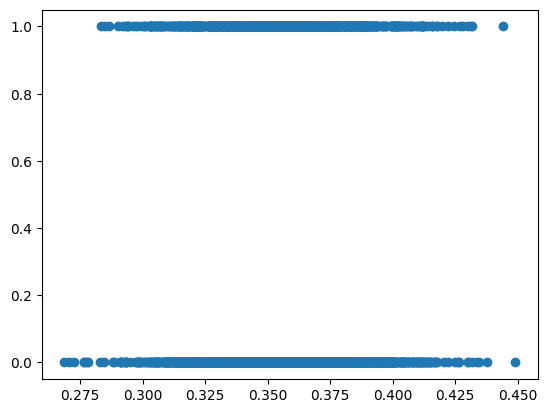

In [35]:
plt.scatter(reg_pred,Y_test)



R square and Adjusted R square 

R ^ 2 = 1 - SSR/SST

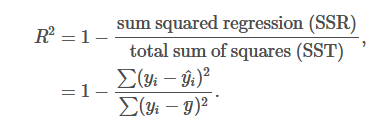

In [36]:
# Upon taking linear approach r2 score result--> Not suitable 
from sklearn.metrics import r2_score
#syntax of r2 pred = r2_score(y_test{TRUE VALUES OF Y}, y_pred{PREDICTED VALUES OF Y})
score = r2_score(Y_test,reg_pred)
print(score)

-0.0017593457037710092


Model Selection / Model Performance Review

In [37]:
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
         'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'), 
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB()}

In [38]:
for i in models: 
    obj = models[i]
    obj.fit(X_train, Y_train)
    obj_pred = obj.predict(X_test)
    accuracy = obj.score(X_test,Y_test)
    precision = precision_score(Y_test,obj_pred,zero_division=1)
    print('Accuracy of '+i+': ',accuracy)
    print('Precision of '+i+': ',precision)
    print("")

Accuracy of Logistic_Regression:  0.6325599087105364
Precision of Logistic_Regression:  1.0



Accuracy of Random_Forest:  0.6238113351084063
Precision of Random_Forest:  0.27450980392156865

Accuracy of XGBoost:  0.5815899581589958
Precision of XGBoost:  0.37358490566037733

Accuracy of SVM:  0.6317991631799164
Precision of SVM:  0.0

Accuracy of KNN:  0.607835678965386
Precision of KNN:  0.3673469387755102

Accuracy of Naive_Bayes:  0.6295169265880562
Precision of Naive_Bayes:  0.40476190476190477



In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [41]:
reg_pred_1 = logreg.predict(X_test)

In [42]:
reg_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
Y_test

2661    1
3267    1
7939    0
3722    0
3007    0
       ..
4837    0
6095    1
2197    0
7944    0
166     0
Name: Heart Attack Risk, Length: 2629, dtype: int64

In [44]:
logreg.score(X_test,Y_test)

0.6325599087105364

New Data Prediction

In [45]:
output = logreg.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

C:\Users\Dev\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
output

array([0], dtype=int64)

Pickling The Model file For Developement 

In [47]:
import pickle

In [48]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [49]:
pickle.dump(logreg,open('Heart_prediction.pkl' , 'wb'))

In [50]:
pickled_model = pickle.load(open('Heart_prediction.pkl','rb'))

In [51]:
pickled_model.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

C:\Users\Dev\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [52]:
#Data for API testing 
X.iloc[0]

Age                                    67
Cholesterol                           208
Heart Rate                             72
Diabetes                                0
Family History                          0
Smoking                                 1
Obesity                                 0
Alcohol Consumption                     0
Exercise Hours Per Week                 4
Diet                                    1
Previous Heart Problems                 0
Medication Use                          0
Stress Level                            9
Sedentary Hours Per Day                 6
Income                             261404
BMI                                    31
Physical Activity Days Per Week         0
Sleep Hours Per Day                     6
Continent_Africa                        0
Continent_Asia                          0
Continent_Australia                     0
Continent_Europe                        0
Continent_North America                 0
Continent_South America           